#### Business Problem

This dataset contains information about bank customers and their churn status, which indicates whether they have exited the bank or not. It is suitable for exploring and analyzing factors influencing customer churn in banking institutions and for building predictive models to identify customers at risk of churning.

#### Features:

RowNumber: The sequential number assigned to each row in the dataset.

CustomerId: A unique identifier for each customer.

Surname: The surname of the customer.

CreditScore: The credit score of the customer.

Geography: The geographical location of the customer (e.g., country or region).

Gender: The gender of the customer.

Age: The age of the customer.

Tenure: The number of years the customer has been with the bank.

Balance: The account balance of the customer.

NumOfProducts: The number of bank products the customer has.

HasCrCard: Indicates whether the customer has a credit card (binary: yes/no).

IsActiveMember: Indicates whether the customer is an active member (binary: yes/no).

EstimatedSalary: The estimated salary of the customer.

Exited: Indicates whether the customer has exited the bank (binary: yes/no).

In [85]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings 
warnings.simplefilter("ignore")

#### Load the data 

In [86]:
df= pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### Data Understanding 

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [88]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [89]:
df['RowNumber'].nunique()

10000

In [90]:
df['CustomerId'].nunique()

10000

In [91]:
df['Surname'].nunique()

2932

In [92]:
df['Geography'].nunique()

3

In [93]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [94]:
df['Gender'].nunique()

2

In [95]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [96]:
df['NumOfProducts'].nunique()

4

In [97]:
df['NumOfProducts'].value_counts()

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [98]:
df['HasCrCard'].nunique()

2

In [99]:
df['HasCrCard'].value_counts()

HasCrCard
1    7055
0    2945
Name: count, dtype: int64

In [100]:
df[ 'IsActiveMember'].nunique()

2

In [101]:
df['IsActiveMember'].value_counts()

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64

In [102]:
df['Exited'].nunique()

2

In [103]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [104]:
df['Tenure'].nunique()

11

In [105]:
df['Tenure'].value_counts()

Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64

In [106]:
df['CreditScore'].describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

In [107]:
df['Balance'].describe()

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64

In [108]:
df['EstimatedSalary'].describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64

In [109]:
df["Age"].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

#### Drop unimportant columns as per feature selection (Filter Methods)

In [110]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'],inplace=True)

In [111]:
continous=['Balance','EstimatedSalary','Age','CreditScore']

discrete_categorical = ['Geography','Gender','HasCrCard','IsActiveMember', 'Exited']

discrete_count = ['Tenure','NumOfProducts']

In [112]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

#### Exploratory Data Analysis 

#### For Continous Variable

In [113]:
df[continous].describe()

,Balance,EstimatedSalary,Age,CreditScore
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,76485.889288,100090.239881,38.921800,650.528800
std,62397.405202,57510.492818,10.487806,96.653299
min,0.000000,11.580000,18.000000,350.000000
25%,0.000000,51002.110000,32.000000,584.000000
50%,97198.540000,100193.915000,37.000000,652.000000
75%,127644.240000,149388.247500,44.000000,718.000000
max,250898.090000,199992.480000,92.000000,850.000000


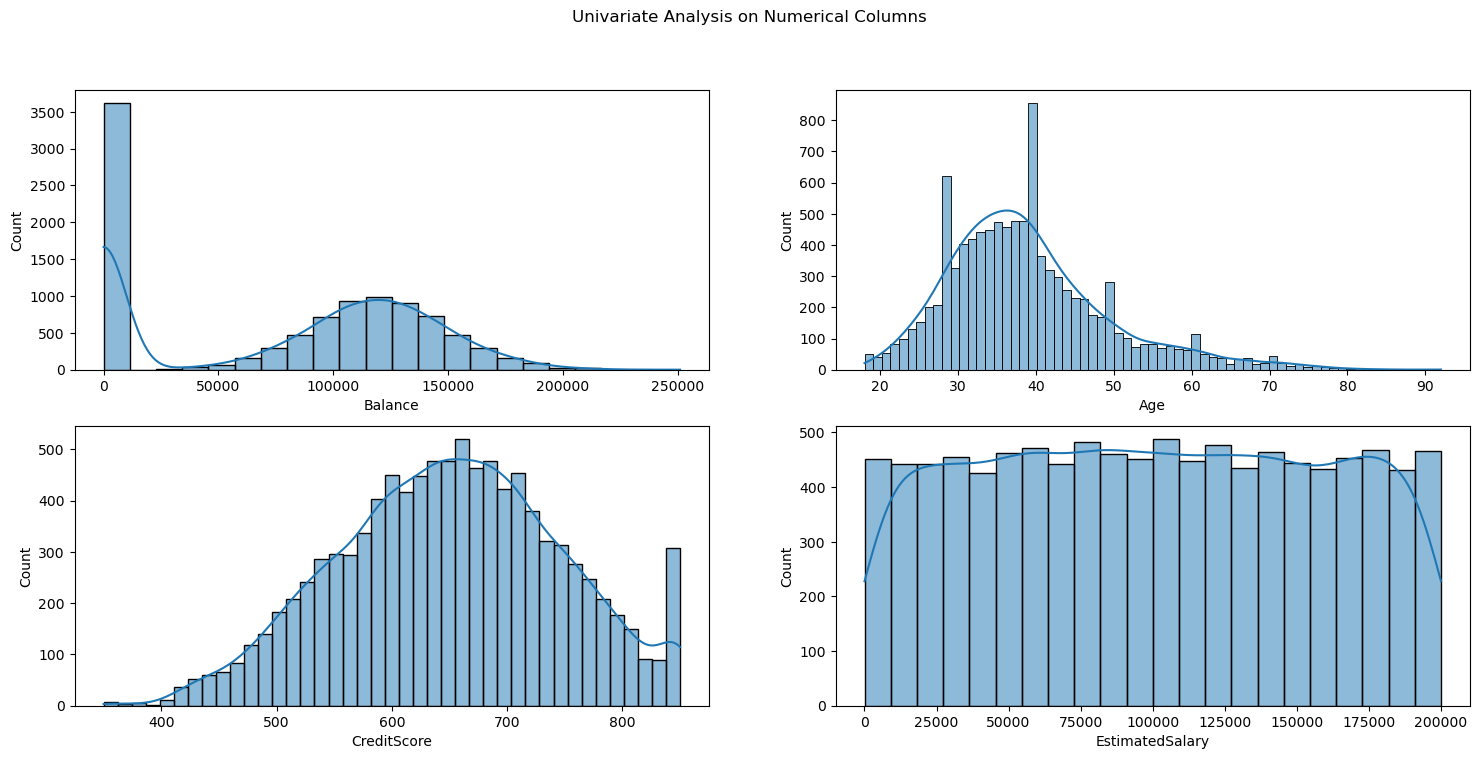

In [114]:
plt.rcParams["figure.figsize"] = (18,8)

plt.subplot(2,2,1)
sns.histplot(df["Balance"],kde=True)

plt.subplot(2,2,2)
sns.histplot(df["Age"],kde=True)

plt.subplot(2,2,3)
sns.histplot(df["CreditScore"],kde=True)


plt.subplot(2,2,4)
sns.histplot(df["EstimatedSalary"],kde=True)

plt.suptitle("Univariate Analysis on Numerical Columns")
plt.show()

In [115]:
df[continous].skew()

Balance           -0.141109
EstimatedSalary    0.002085
Age                1.011320
CreditScore       -0.071607
dtype: float64

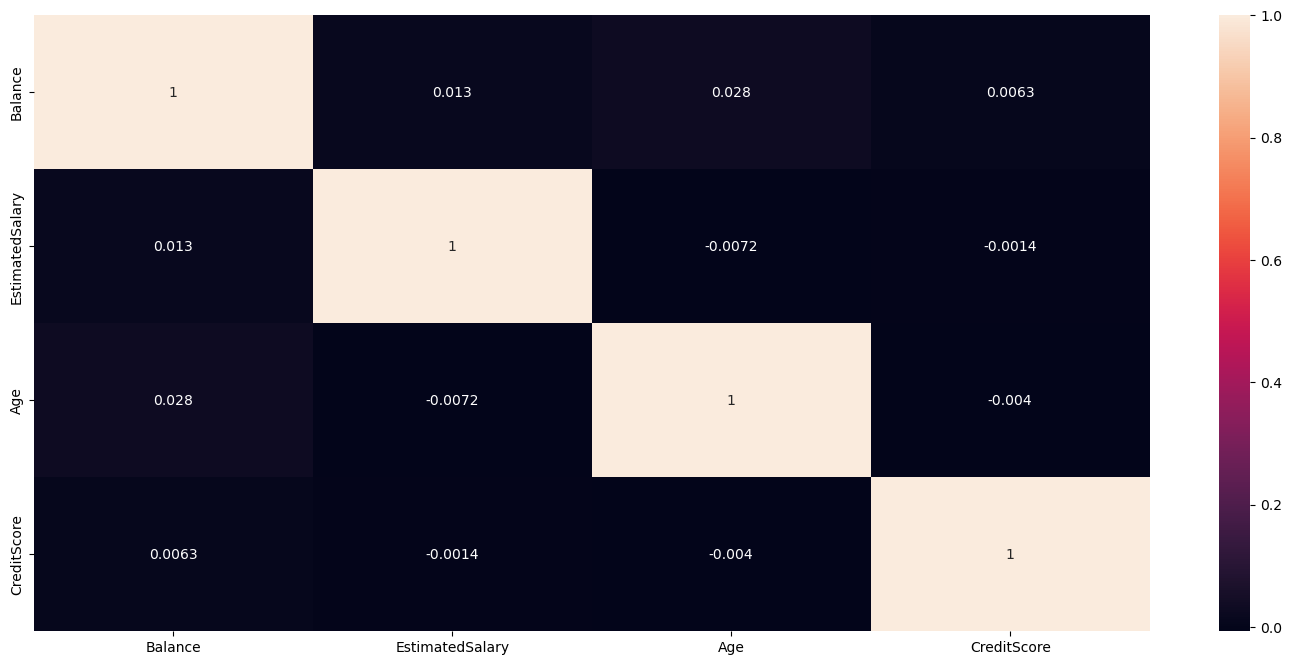

In [116]:
sns.heatmap(df[continous].corr(),annot=True)
plt.show()

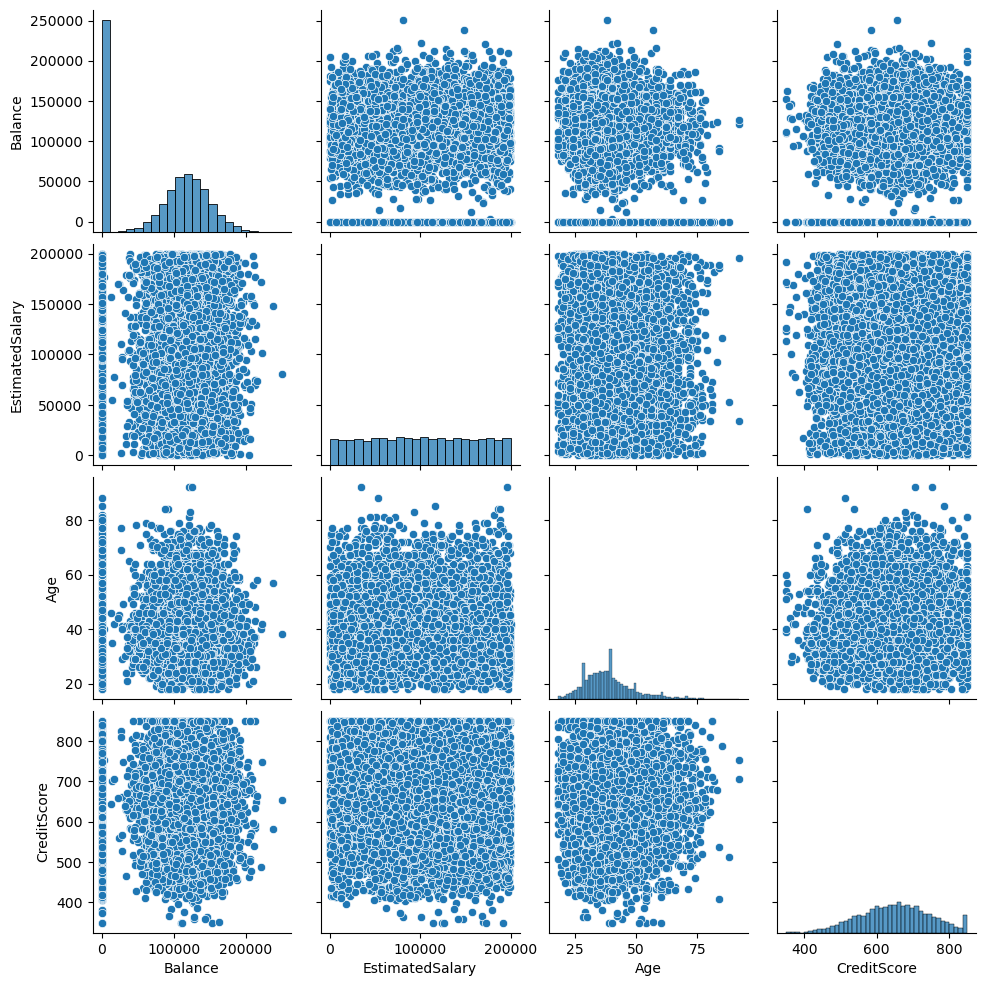

In [117]:
sns.pairplot(df[continous])
plt.show()

#### for Discrete Variables

In [118]:
df[discrete_categorical].describe()

,HasCrCard,IsActiveMember,Exited
count,10000.00000,10000.000000,10000.000000
mean,0.70550,0.515100,0.203700
std,0.45584,0.499797,0.402769
min,0.00000,0.000000,0.000000
25%,0.00000,0.000000,0.000000
50%,1.00000,1.000000,0.000000
75%,1.00000,1.000000,0.000000
max,1.00000,1.000000,1.000000


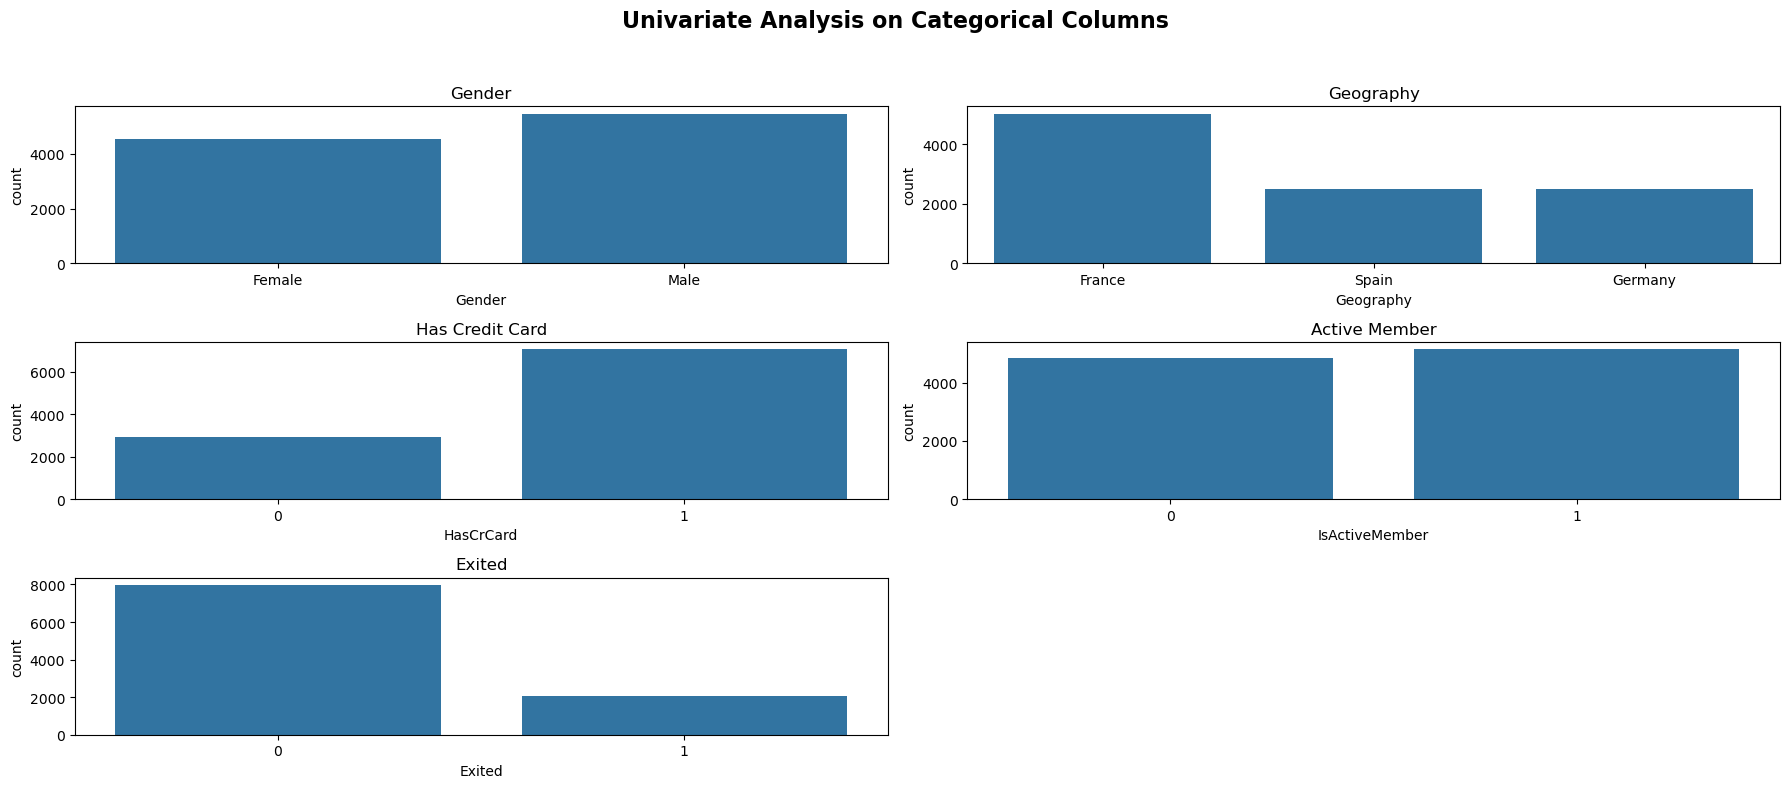

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (18, 8)

plt.subplot(3, 2, 1)
sns.countplot(x="Gender", data=df)
plt.title("Gender")

plt.subplot(3, 2, 2)
sns.countplot(x="Geography", data=df)
plt.title("Geography")

plt.subplot(3, 2, 3)
sns.countplot(x="HasCrCard", data=df)
plt.title("Has Credit Card")

plt.subplot(3, 2, 4)
sns.countplot(x="IsActiveMember", data=df)
plt.title("Active Member")

plt.subplot(3, 2, 5)
sns.countplot(x="Exited", data=df)
plt.title("Exited")

plt.suptitle("Univariate Analysis on Categorical Columns", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit suptitle
plt.show()



In [120]:
#  Compare all the Categories with respect to Exited

print("Impact of Gender on  Exited")
print(pd.crosstab(df["Exited"],df["Gender"]))
print("\n")

print("Impact of Geography on  Exited")
print(pd.crosstab(df["Exited"],df["Geography"]))
print("\n")


print("Impact of HasCrCard on  Exited")
print(pd.crosstab(df["Exited"],df["HasCrCard"]))
print("\n")

print("Impact of IsActiveMember on  Exited")
print(pd.crosstab(df["Exited"],df["IsActiveMember"]))
print("\n")


Impact of Gender on  Exited
Gender  Female  Male
Exited              
0         3404  4559
1         1139   898


Impact of Geography on  Exited
Geography  France  Germany  Spain
Exited                           
0            4204     1695   2064
1             810      814    413


Impact of HasCrCard on  Exited
HasCrCard     0     1
Exited               
0          2332  5631
1           613  1424


Impact of IsActiveMember on  Exited
IsActiveMember     0     1
Exited                    
0               3547  4416
1               1302   735




##### Check for Missing Values 

In [121]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

##### Check for Skewness 

In [122]:
df[continous].skew()

Balance           -0.141109
EstimatedSalary    0.002085
Age                1.011320
CreditScore       -0.071607
dtype: float64

##### Check Outliers

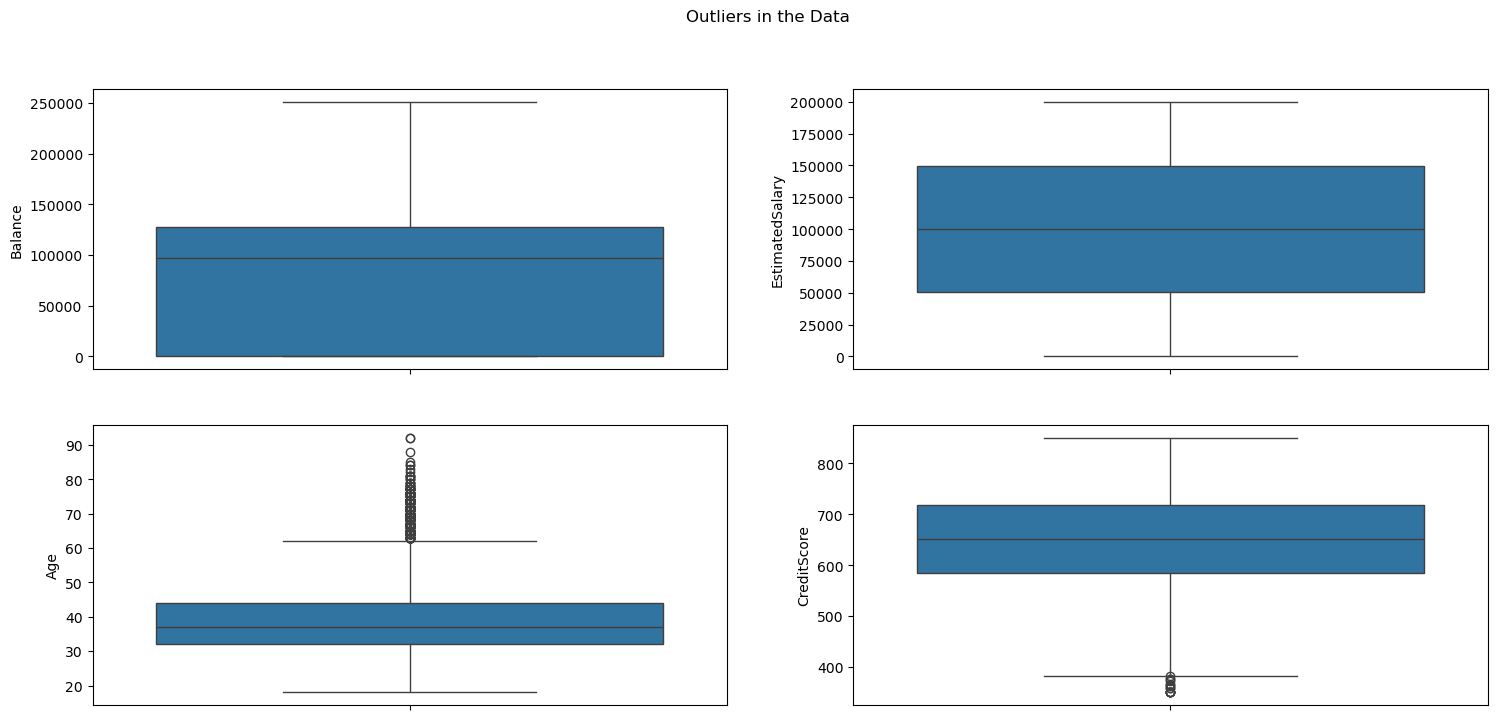

In [123]:
# lets visualize the outliers using Box Plot 

plt.subplot(2,2,1)
sns.boxplot(df["Balance"])

plt.subplot(2,2,2)
sns.boxplot(df["EstimatedSalary"])

plt.subplot(2,2,3)
sns.boxplot(df["Age"])

plt.subplot(2,2,4)
sns.boxplot(df["CreditScore"])

plt.suptitle("Outliers in the Data")
plt.tight_layout
plt.show()


#### Data Preparation 

##### Data type Conversion

In [124]:
df["Age"]          = df["Age"].astype("float")
df["CreditScore"]  = df["CreditScore"].astype("float")

##### Outliers Treatment

In [125]:
# To extract Outliers from Age column 

Q3 = df["Age"].quantile(0.75)
Q1 = df["Age"].quantile(0.25)
IQR = Q3-Q1
upper_limit = Q3+(1.5*IQR)
lower_limit = Q1-(1.5*IQR)

Outliers=df[(df["Age"]>upper_limit) | (df["Age"]<lower_limit)]
num_outliers = Outliers.shape[0]
print("Outliers in Age:",num_outliers)

Outliers in Age: 359


In [126]:
# Outliers < 5% we can remove outliers 
df_clean = df[(df['Age'] >= lower_limit) & (df['Age'] <= upper_limit)] 

##### Encoding

In [127]:
df_clean["Gender"] = df_clean["Gender"].replace({"Male":1,"Female":0})
df_clean["Geography"] = df_clean["Geography"].replace({"France":0,"Germany":1,"Spain":2})

##### Transformations

In [128]:
df_clean[continous].skew()

Balance           -0.142040
EstimatedSalary   -0.001975
Age                0.490409
CreditScore       -0.072269
dtype: float64

In [129]:
# Root Transformation
df_clean["sqr_Age"]=df_clean["Age"]**(1/4)
df_clean["sqr_Age"].skew()

np.float64(0.026659599187018337)

#### x&y

In [130]:
x= df_clean.drop("Exited",axis=1)
y= df_clean["Exited"]

In [131]:
random_state_number = np.random.randint(0, 1000)  

#### train-test-split

In [132]:
from sklearn.model_selection import train_test_split

random_state_number = np.random.randint(0, 1000)  
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=random_state_number)
print("Random State Number:", random_state_number)

Random State Number: 832


#### Modelling & Evaluation 

In [133]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import GradientBoostingClassifier 
from xgboost import XGBClassifier 

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score 
from sklearn.model_selection import cross_val_score 

#### 1 Logistic Regression 

In [134]:
# Modelling 

from sklearn.linear_model import LogisticRegression 
log_model = LogisticRegression()
log_model.fit(x_train,y_train)

#Predict & Evaluate on train data 
ypred_train = log_model.predict(x_train)   # default threshold value is 0.5 
print("Train Accuracy:",accuracy_score(y_train,ypred_train))

#Cross Validation on Train  data
print("CV Score :",cross_val_score(log_model,x_train,y_train,cv=5,scoring="accuracy").mean())

#predict & Evaluation on test data 
ypred_test = log_model.predict(x_test)
print("Test Accuracy :",accuracy_score(y_test,ypred_test))

Train Accuracy: 0.8049792531120332
CV Score : 0.8069232793091766
Test Accuracy : 0.7905650596163816


In [135]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred_test))

from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_test))

[[1482   37]
 [ 367   43]]
              precision    recall  f1-score   support

           0       0.80      0.98      0.88      1519
           1       0.54      0.10      0.18       410

    accuracy                           0.79      1929
   macro avg       0.67      0.54      0.53      1929
weighted avg       0.75      0.79      0.73      1929



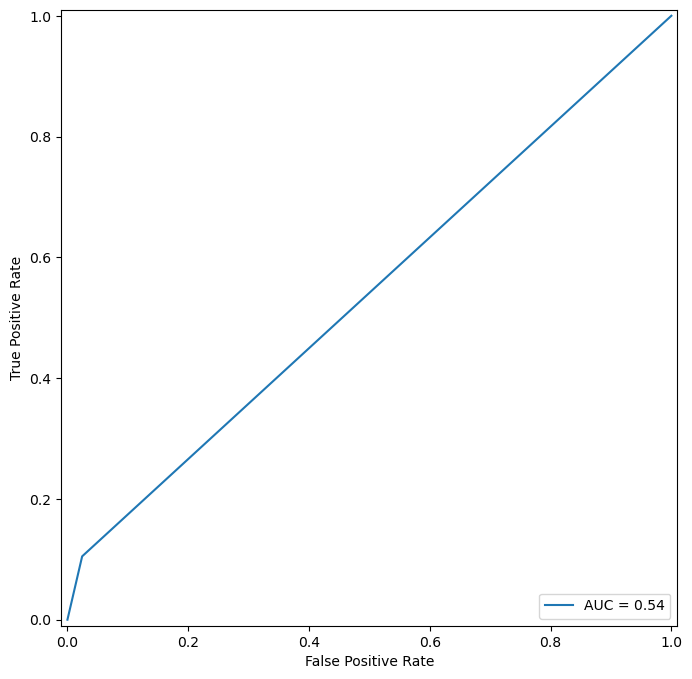

In [136]:
from sklearn.metrics import  roc_curve,auc,RocCurveDisplay

fpr,tpr,thresholds = roc_curve(y_test,ypred_test)
roc_auc = auc(fpr,tpr)
RocCurveDisplay(fpr=fpr, tpr=tpr,roc_auc=roc_auc).plot()
plt.show()

In [137]:
#AUC Score
from sklearn.metrics import roc_auc_score
print("AUC Score:",roc_auc_score(y_test,ypred_test))

AUC Score: 0.5402599592157871


#### KNN  

In [138]:
# Hyperparameter tunning 
estimator = KNeighborsClassifier()
param_grid = {"n_neighbors": list(range(1,50)),"p":[1,2]}
knn_grid = GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
knn_grid.fit(x_train,y_train)

#KNN with best Hyperparameters 
knn_grid.best_estimator_

KNeighborsClassifier(n_neighbors=24, p=1)

In [139]:
# Modelling 
knn_model = knn_grid.best_estimator_
knn_model.fit(x_train,y_train)

#Predict & Evaluate on train data 
ypred_train = knn_model.predict(x_train)
print("Train Accuracy :",accuracy_score(y_train,ypred_train))

#Cross Validation on Train data 
print("CV Score:",cross_val_score(log_model,x_train,y_train,cv=5,scoring="accuracy").mean())

#Predict & Evaluate on test data 
ypred_test = knn_model.predict(x_test)
print("Test Accuracy :",accuracy_score(y_test,ypred_test))

Train Accuracy : 0.7992738589211619
CV Score: 0.8069232793091766
Test Accuracy : 0.7869362363919129


#### Decision Tree Classifier 

In [140]:
model = DecisionTreeClassifier(random_state=True)
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=True)

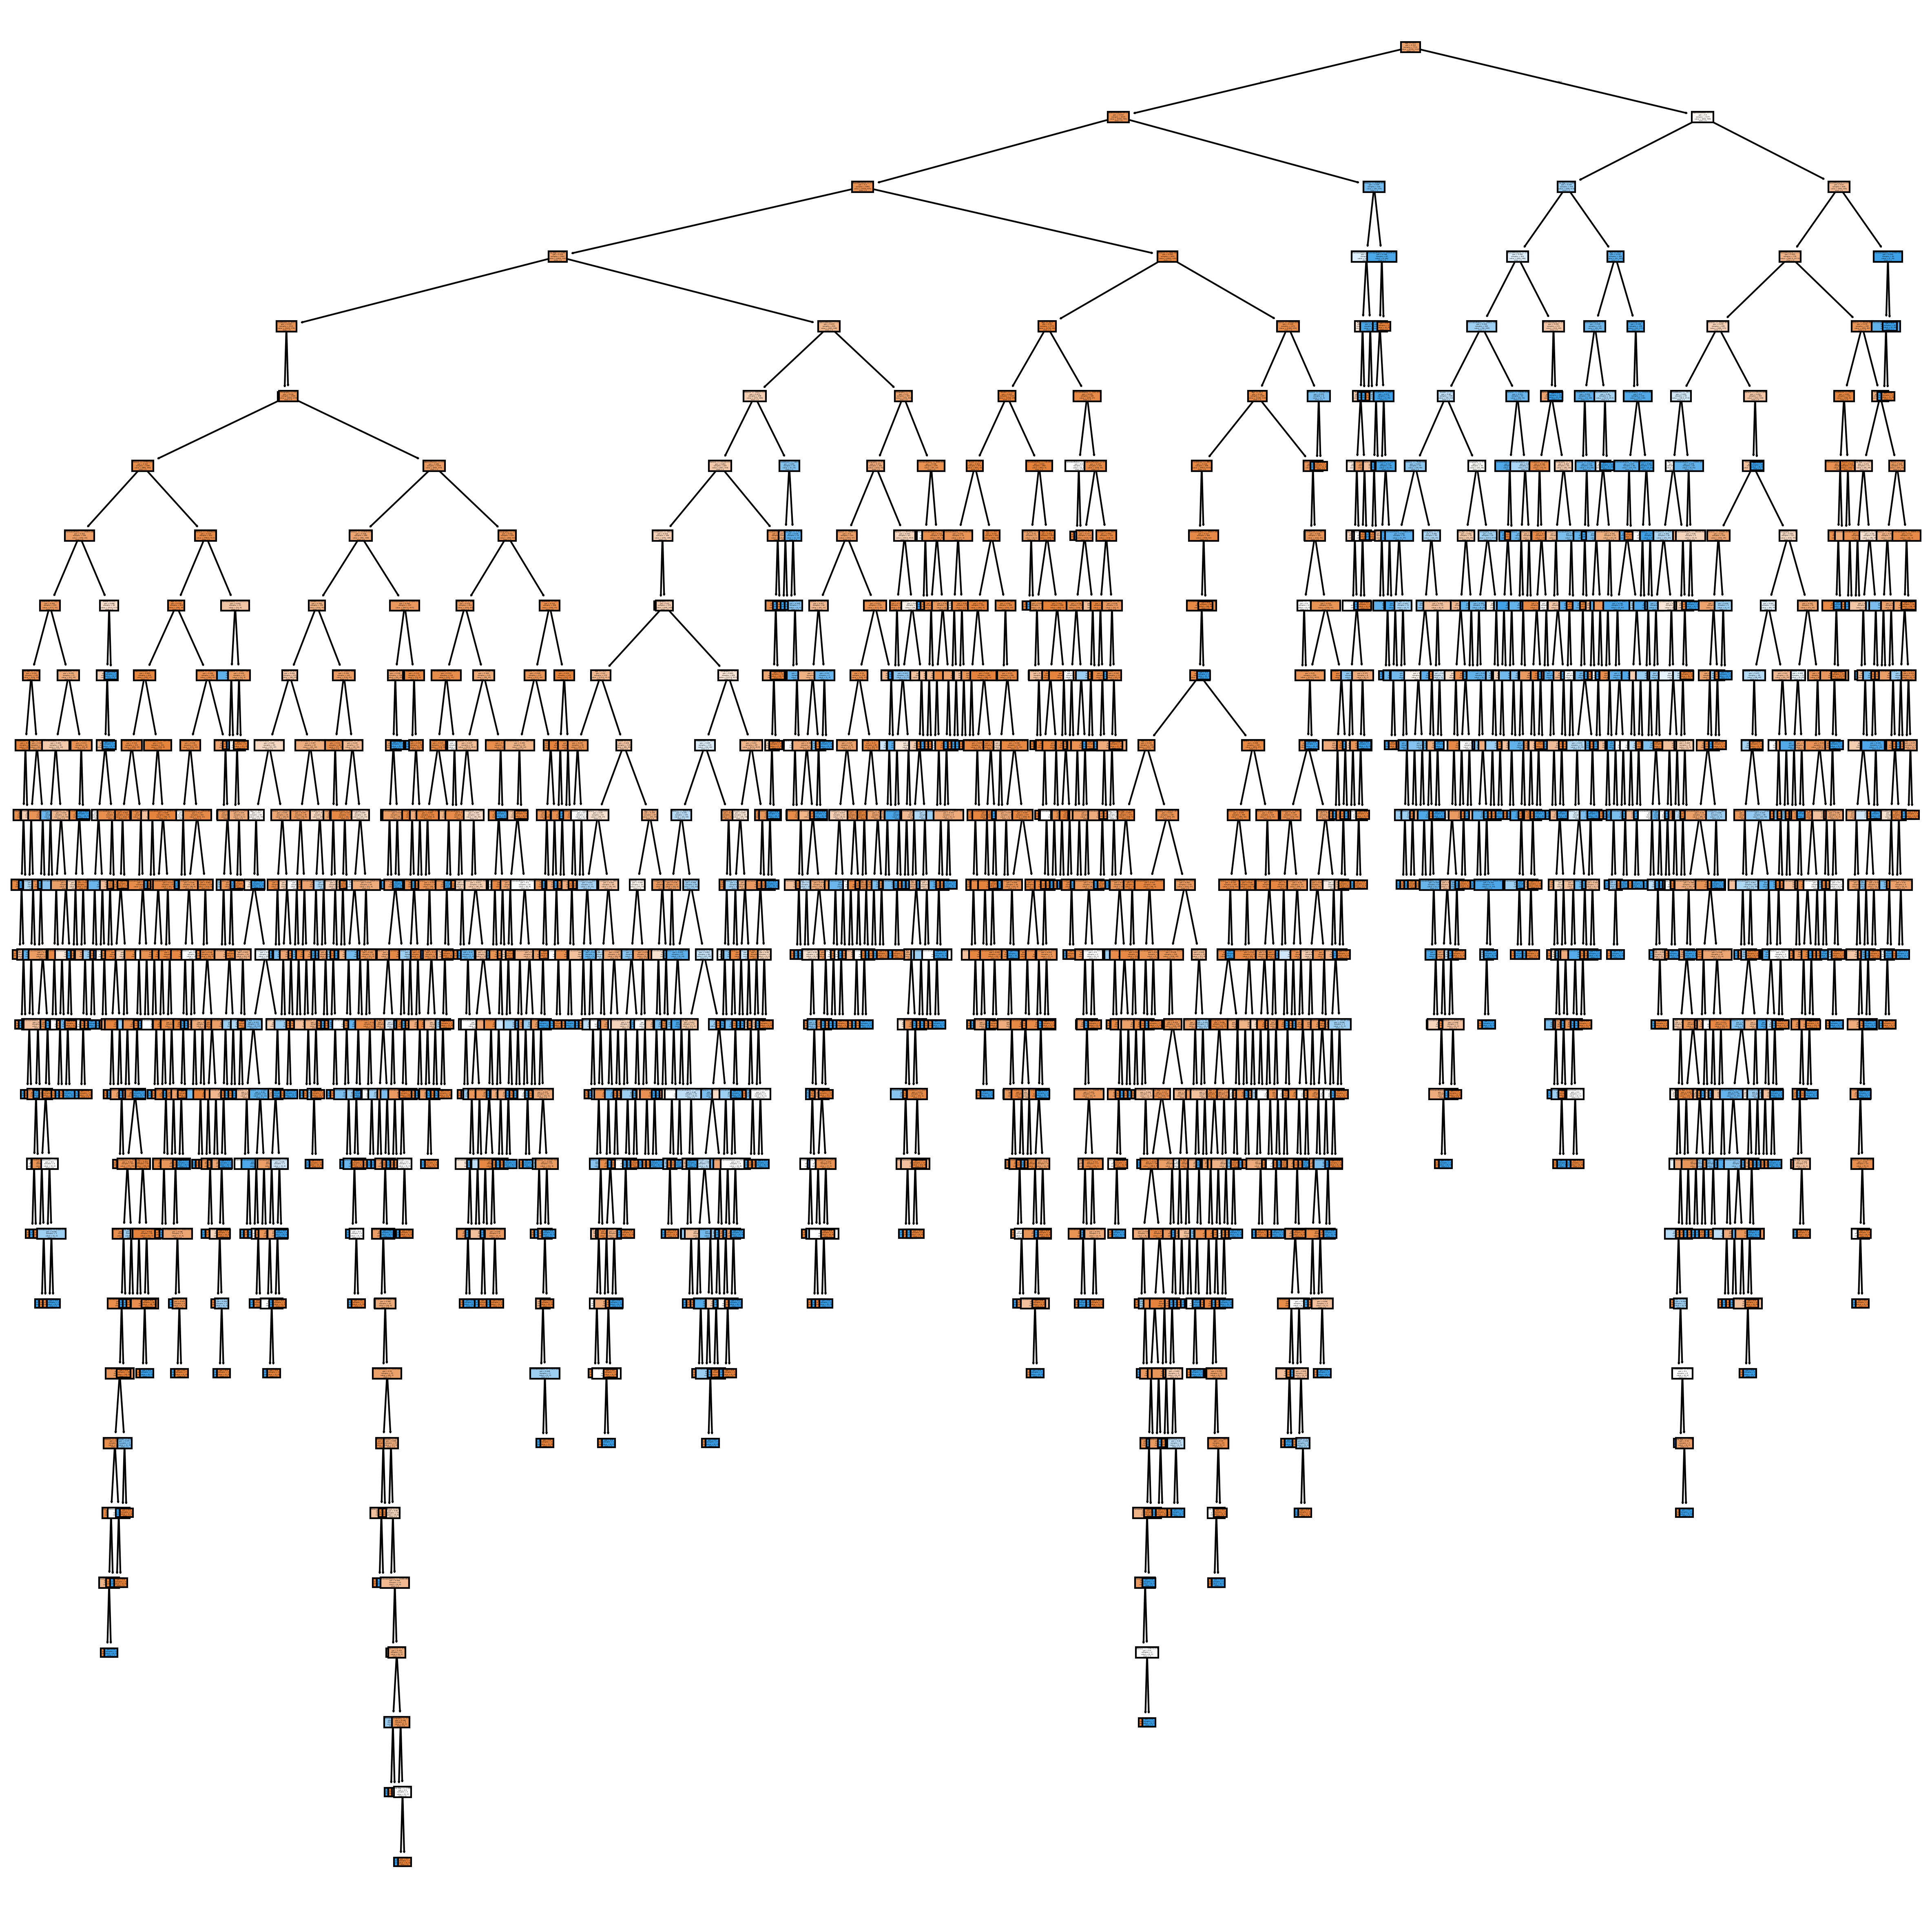

In [141]:
from sklearn.tree import plot_tree 
plt.figure(figsize=(20,20),dpi=300)
plot_tree(model,filled=True,
          feature_names=x_train.columns.tolist(),
          class_names=["0","1"])
plt.show()

In [142]:
#Hyper parameter tunning 
estimator = DecisionTreeClassifier(random_state=True)

param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": list(range(1, 16))
}

dt_grid = GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
dt_grid.fit(x_train,y_train)

dt = dt_grid.best_estimator_
dt

DecisionTreeClassifier(max_depth=5, random_state=True)

In [143]:
#Important feature 
feats_ab = pd.DataFrame(data=dt.feature_importances_,
                        index=x.columns,
                        columns=["Importance"])
important_features_dt = feats_ab[feats_ab["Importance"]>0].index.tolist()
important_features_dt

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'sqr_Age']

In [144]:
# Creating Decision Tree Model with important parameters and important features

#Selecting train & test data 
x_train_dt = x_train[important_features_dt]
x_test_dt = x_test[important_features_dt]

#Modelling 
dt= dt_grid.best_estimator_
dt.fit(x_train_dt,y_train)

#Evaluation 
ypred_train = dt.predict(x_train_dt)
ypred_test = dt.predict(x_test_dt)

print("Train Accuracy :",accuracy_score(y_train,ypred_train))
print("CV Score :",cross_val_score(dt,x_train_dt,y_train,cv=5,scoring="accuracy").mean())
print("Test Accuracy :",accuracy_score(y_test,ypred_test))

Train Accuracy : 0.8628112033195021
CV Score : 0.858272706411029
Test Accuracy : 0.8413685847589425


#### Random Forest Classifier 

In [145]:
#Hyper parameter tunning 
estimator = RandomForestClassifier(random_state=True)

param_grid = {
    "n_estimators": list(range(1, 51))
}

rf_grid = GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
rf_grid.fit(x_train,y_train)

rf = rf_grid.best_estimator_
rf

RandomForestClassifier(n_estimators=41, random_state=True)

In [146]:
#Important feature 
feats_ab = pd.DataFrame(data=rf.feature_importances_,
                        index=x.columns,
                        columns=["Importance"])
important_features_rf = feats_ab[feats_ab["Importance"]>0].index.tolist()
important_features_rf

['CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'sqr_Age']

In [147]:
# Creating RandomForest Model with important parameters and important features

#Selecting train & test data 
x_train_rf = x_train[important_features_rf]
x_test_rf = x_test[important_features_rf]

#Modelling 
rf= rf_grid.best_estimator_
rf.fit(x_train_rf,y_train)

#Evaluation 
ypred_train = rf.predict(x_train_rf)
ypred_test = rf.predict(x_test_rf)

print("Train Accuracy :",accuracy_score(y_train,ypred_train))
print("CV Score :",cross_val_score(rf,x_train_rf,y_train,cv=5,scoring="accuracy").mean())
print("Test Accuracy :",accuracy_score(y_test,ypred_test))

Train Accuracy : 0.9988329875518672
CV Score : 0.8604773829007282
Test Accuracy : 0.8429237947122862


#### AdaBoost Classifier 

In [148]:
estimator = AdaBoostClassifier(random_state=True)

param_grid = {
    "n_estimators": list(range(1, 51))
}

ab_grid = GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
ab_grid.fit(x_train,y_train)

ab = ab_grid.best_estimator_
ab

AdaBoostClassifier(n_estimators=34, random_state=True)

In [149]:
#Important feature 
feats_ab = pd.DataFrame(data=ab.feature_importances_,
                        index=x.columns,
                        columns=["Importance"])
important_features_ab = feats_ab[feats_ab["Importance"]>0].index.tolist()
important_features_ab

['Geography',
 'Gender',
 'Age',
 'Balance',
 'NumOfProducts',
 'IsActiveMember',
 'sqr_Age']

In [150]:
x_train_ab = x_train[important_features_ab]
x_test_ab = x_test[important_features_ab]

#Modelling 
ab= ab_grid.best_estimator_
ab.fit(x_train_ab,y_train)

#Evaluation 
ypred_train = ab.predict(x_train_ab)
ypred_test = ab.predict(x_test_ab)

print("Train Accuracy :",accuracy_score(y_train,ypred_train))
print("CV Score :",cross_val_score(ab,x_train_ab,y_train,cv=5,scoring="accuracy").mean())
print("Test Accuracy :",accuracy_score(y_test,ypred_test))

Train Accuracy : 0.8593101659751037
CV Score : 0.8546413954321134
Test Accuracy : 0.844997407983411


#### Gradient Boost Classifier 

In [151]:
estimator = GradientBoostingClassifier(random_state=True)

param_grid = {
    "n_estimators": list(range(1, 10)),
    "learning_rate":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
}

gb_grid = GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
gb_grid.fit(x_train,y_train)

gb = gb_grid.best_estimator_
gb

GradientBoostingClassifier(learning_rate=1.0, n_estimators=5, random_state=True)

In [152]:
#Important feature 
feats_gb = pd.DataFrame(data=gb.feature_importances_,
                        index=x.columns,
                        columns=["Importance"])
important_features_gb = feats_gb[feats_gb["Importance"]>0].index.tolist()
important_features_gb

['CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'IsActiveMember',
 'EstimatedSalary',
 'sqr_Age']

In [153]:
x_train_gb = x_train[important_features_gb]
x_test_gb = x_test[important_features_gb]

#Modelling 
gb= gb_grid.best_estimator_
gb.fit(x_train_gb,y_train)

#Evaluation 
ypred_train = gb.predict(x_train_gb)
ypred_test = gb.predict(x_test_gb)

print("Train Accuracy :",accuracy_score(y_train,ypred_train))
print("CV Score :",cross_val_score(gb,x_train_gb,y_train,cv=5,scoring="accuracy").mean())
print("Test Accuracy :",accuracy_score(y_test,ypred_test))

Train Accuracy : 0.8635892116182573
CV Score : 0.8625509287161887
Test Accuracy : 0.8455158113011924


#### XGBoost Classifier

In [154]:
#Hyper parameter tunning 
estimator = XGBClassifier()

param_grid = {
    "n_estimators":[10,20,40,100],
    "max_depth":[3,4,5],
    "gamma":[0,0.15,0.3,0.5,1]
}

xgb_grid = GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
xgb_grid.fit(x_train,y_train)

xgb = xgb_grid.best_estimator_
xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=40,
              n_jobs=None, num_parallel_tree=None, ...)

In [155]:
#Important feature 
feats_xgb = pd.DataFrame(data=xgb.feature_importances_,
                        index=x.columns,
                        columns=["Importance"])
important_features_xgb = feats_xgb[feats_xgb["Importance"]>0].index.tolist()
important_features_xgb

['CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary']

In [156]:
x_train_xgb = x_train[important_features_xgb]
x_test_xgb = x_test[important_features_xgb]

#Modelling 
xgb= xgb_grid.best_estimator_
xgb.fit(x_train_xgb,y_train)

#Evaluation 
ypred_train = xgb.predict(x_train_xgb)
ypred_test = xgb.predict(x_test_xgb)

print("Train Accuracy :",accuracy_score(y_train,ypred_train))
print("CV Score :",cross_val_score(xgb,x_train_xgb,y_train,cv=5,scoring="accuracy").mean())
print("Test Accuracy :",accuracy_score(y_test,ypred_test))

Train Accuracy : 0.88576244813278
CV Score : 0.8651441218573819
Test Accuracy : 0.8517366511145671


#### Save The Best Model 

In [163]:
from joblib import dump

dump(gb,"Churn.joblib")

['Churn.joblib']

#### Predict on New data 

In [164]:
input_data={"RowNumber":"10000",	"CustomerId":"19737777",	"Surname":"Mitchell",	"CreditScore":"777",	
            "Geography":"Spain",	"Gender":"Female", "Age":"40",	"Tenure":"7",	"Balance":"125510.82",	"NumOfProducts":"3",	
            "HasCrCard":"0", "IsActiveMember":"1",	"EstimatedSalary":"112542.58"}

In [165]:
df=pd.DataFrame(input_data,index=[0])
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,10000,19737777,Mitchell,777,Spain,Female,40,7,125510.82,3,0,1,112542.58


#### Apply Data preprocessing on Unknown Data

In [166]:
df.drop(columns=["RowNumber","CustomerId","Surname"],inplace=True)
df["Age"]          = df["Age"].astype("float")
df["CreditScore"]  = df["CreditScore"].astype("float")
df_clean = df[(df['Age'] >= lower_limit) & (df['Age'] <= upper_limit)] 
df_clean["Gender"] = df_clean["Gender"].replace({"Male":1,"Female":0})
df_clean["Geography"] = df_clean["Geography"].replace({"France":0,"Germany":1,"Spain":2})
df_clean["sqr_Age"]=df_clean["Age"]**(1/4)

x_new=df_clean

In [168]:
# Select Important features of best model 
x_new = x_new[important_features_gb]

#Prediction by using best model
gb.predict(x_new)

array([1])